<div style="background:#5D6D7E;padding:20px;color:#ffffff;margin-top:10px;">

# NLP - Portafolio de Ejercicios 2

## Profesora: Lisibonny Beato
### Período 3-2024-2025</div>


In [1]:
# Importando algunas librerias

import numpy as np
import pandas as pd
import nltk
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec
import warnings
from nltk import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.util import ngrams
from collections import Counter
from nltk.util import ngrams
import matplotlib.pyplot as plt
import seaborn as sns
from gensim.models import Word2Vec, KeyedVectors

import string
warnings.filterwarnings('ignore')

# Utilizando el archivo de noticias de ESPN que recopiló en una actividad pasada, realice las siguientes tareas de preprocesamiento


## 1. Lematización y Stemming
### Puntuación máxima de la tarea: 1
#### Después de haber eliminado los signos de puntuación y las palabras vacías de su corpus, tokenizelo y con estos tokens guarde en dos listas distintas los tokens lematizados y los tokens luego de obtenida su raiz.

In [2]:
# Tomemos el archivo de espn noticias
df = pd.read_csv('noticias.csv')
df.head()

,title,date,summary,description
0,Welcome aboard: These are college football's t...,"Fri, 9 May 2025 15:01:18 EST","From top recruits to big-time transfers, these...","From top recruits to big-time transfers, these..."
1,Post-spring Way-Too-Early Top 25: Where do Tex...,"Fri, 9 May 2025 15:01:18 EST",Where do the top teams stand after spring prac...,Where do the top teams stand after spring prac...
2,"Tiger's son, Charlie, fails to qualify for U.S...","Fri, 9 May 2025 15:04:19 EST","Sixteen-year-old Charlie Woods, son of Tiger W...","Sixteen-year-old Charlie Woods, son of Tiger W..."
3,UNC: Belichick's girlfriend welcome at school,"Fri, 9 May 2025 15:04:19 EST",North Carolina issued a statement saying Bill ...,North Carolina issued a statement saying Bill ...
4,Pats DC Williams dealing with medical condition,"Fri, 9 May 2025 15:04:19 EST",Patriots defensive coordinator Terrell William...,Patriots defensive coordinator Terrell William...


In [3]:
# Tumbemos la columna date ya que no la necesitamos.

df = df.drop(columns=['date'])

In [4]:
# La de summary es casi identica a la de description por no decir igual, asi que dropeemosla tambien.

df = df.drop(columns=['summary'])

In [5]:
# Vamos a pasar a lower case la columna description

df['description'] = df['description'].apply(lambda x: str.lower(x))
df.head()

,title,description
0,Welcome aboard: These are college football's t...,"from top recruits to big-time transfers, these..."
1,Post-spring Way-Too-Early Top 25: Where do Tex...,where do the top teams stand after spring prac...
2,"Tiger's son, Charlie, fails to qualify for U.S...","sixteen-year-old charlie woods, son of tiger w..."
3,UNC: Belichick's girlfriend welcome at school,north carolina issued a statement saying bill ...
4,Pats DC Williams dealing with medical condition,patriots defensive coordinator terrell william...


In [6]:
# Vamos a quitar los signos de puntuacion de la columna description

def remove_puctuation(text):
    
    for i in string.punctuation:
        if i in text:
            text = text.replace(i,'')
            
    return text

df['no punctuation'] = df['description'].apply(lambda x: remove_puctuation(x))
df.head()

,title,description,no punctuation
0,Welcome aboard: These are college football's t...,"from top recruits to big-time transfers, these...",from top recruits to bigtime transfers these p...
1,Post-spring Way-Too-Early Top 25: Where do Tex...,where do the top teams stand after spring prac...,where do the top teams stand after spring prac...
2,"Tiger's son, Charlie, fails to qualify for U.S...","sixteen-year-old charlie woods, son of tiger w...",sixteenyearold charlie woods son of tiger wood...
3,UNC: Belichick's girlfriend welcome at school,north carolina issued a statement saying bill ...,north carolina issued a statement saying bill ...
4,Pats DC Williams dealing with medical condition,patriots defensive coordinator terrell william...,patriots defensive coordinator terrell william...


In [7]:
df['tokens'] = df['no punctuation'].apply(nltk.word_tokenize)
df.head()

,title,description,no punctuation,tokens
0,Welcome aboard: These are college football's t...,"from top recruits to big-time transfers, these...",from top recruits to bigtime transfers these p...,"[from, top, recruits, to, bigtime, transfers, ..."
1,Post-spring Way-Too-Early Top 25: Where do Tex...,where do the top teams stand after spring prac...,where do the top teams stand after spring prac...,"[where, do, the, top, teams, stand, after, spr..."
2,"Tiger's son, Charlie, fails to qualify for U.S...","sixteen-year-old charlie woods, son of tiger w...",sixteenyearold charlie woods son of tiger wood...,"[sixteenyearold, charlie, woods, son, of, tige..."
3,UNC: Belichick's girlfriend welcome at school,north carolina issued a statement saying bill ...,north carolina issued a statement saying bill ...,"[north, carolina, issued, a, statement, saying..."
4,Pats DC Williams dealing with medical condition,patriots defensive coordinator terrell william...,patriots defensive coordinator terrell william...,"[patriots, defensive, coordinator, terrell, wi..."


In [8]:
# Ahora encarguemonos de los stopwords.
stop_words = set(nltk.corpus.stopwords.words('english'))
df['no stopwords'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])
df.head()


,title,description,no punctuation,tokens,no stopwords
0,Welcome aboard: These are college football's t...,"from top recruits to big-time transfers, these...",from top recruits to bigtime transfers these p...,"[from, top, recruits, to, bigtime, transfers, ...","[top, recruits, bigtime, transfers, players, l..."
1,Post-spring Way-Too-Early Top 25: Where do Tex...,where do the top teams stand after spring prac...,where do the top teams stand after spring prac...,"[where, do, the, top, teams, stand, after, spr...","[top, teams, stand, spring, practice, roster, ..."
2,"Tiger's son, Charlie, fails to qualify for U.S...","sixteen-year-old charlie woods, son of tiger w...",sixteenyearold charlie woods son of tiger wood...,"[sixteenyearold, charlie, woods, son, of, tige...","[sixteenyearold, charlie, woods, son, tiger, w..."
3,UNC: Belichick's girlfriend welcome at school,north carolina issued a statement saying bill ...,north carolina issued a statement saying bill ...,"[north, carolina, issued, a, statement, saying...","[north, carolina, issued, statement, saying, b..."
4,Pats DC Williams dealing with medical condition,patriots defensive coordinator terrell william...,patriots defensive coordinator terrell william...,"[patriots, defensive, coordinator, terrell, wi...","[patriots, defensive, coordinator, terrell, wi..."


In [9]:
# lemmatizemos cada palabra dentro de la lista que tiene cada fila de la columna no stopwords
word_net = WordNetLemmatizer()
df['lemmatizer'] = df['no stopwords'].apply(lambda x: [word_net.lemmatize(word) for word in x])
df.tail()

,title,description,no punctuation,tokens,no stopwords,lemmatizer
39,The ultimate guide to your draft,andré snellings provides a blueprint to follow...,andré snellings provides a blueprint to follow...,"[andré, snellings, provides, a, blueprint, to,...","[andré, snellings, provides, blueprint, follow...","[andré, snellings, provides, blueprint, follow..."
40,Setting records and continuing a legacy: CJ Ki...,cj kirst is just the latest kirst to make a na...,cj kirst is just the latest kirst to make a na...,"[cj, kirst, is, just, the, latest, kirst, to, ...","[cj, kirst, latest, kirst, make, name, leading...","[cj, kirst, latest, kirst, make, name, leading..."
41,What must Arsenal fix to win the Premier Leagu...,"on sunday, arsenal will give liverpool a guard...",on sunday arsenal will give liverpool a guard ...,"[on, sunday, arsenal, will, give, liverpool, a...","[sunday, arsenal, give, liverpool, guard, hono...","[sunday, arsenal, give, liverpool, guard, hono..."
42,"Transfer rumors, news: Cunha prefers Man Unite...",wolves forward matheus cunha is interested in ...,wolves forward matheus cunha is interested in ...,"[wolves, forward, matheus, cunha, is, interest...","[wolves, forward, matheus, cunha, interested, ...","[wolf, forward, matheus, cunha, interested, ma..."
43,"At long last, Michigan State aligns with Larry...",nassar survivors and msu president kevin guski...,nassar survivors and msu president kevin guski...,"[nassar, survivors, and, msu, president, kevin...","[nassar, survivors, msu, president, kevin, gus...","[nassar, survivor, msu, president, kevin, gusk..."


In [10]:
# Hagamos stemming ahora.
stemmer = PorterStemmer()
df['stemming'] = df['no stopwords'].apply(lambda x: [stemmer.stem(token) for token in x])
df.tail()

,title,description,no punctuation,tokens,no stopwords,lemmatizer,stemming
39,The ultimate guide to your draft,andré snellings provides a blueprint to follow...,andré snellings provides a blueprint to follow...,"[andré, snellings, provides, a, blueprint, to,...","[andré, snellings, provides, blueprint, follow...","[andré, snellings, provides, blueprint, follow...","[andré, snell, provid, blueprint, follow, draf..."
40,Setting records and continuing a legacy: CJ Ki...,cj kirst is just the latest kirst to make a na...,cj kirst is just the latest kirst to make a na...,"[cj, kirst, is, just, the, latest, kirst, to, ...","[cj, kirst, latest, kirst, make, name, leading...","[cj, kirst, latest, kirst, make, name, leading...","[cj, kirst, latest, kirst, make, name, lead, c..."
41,What must Arsenal fix to win the Premier Leagu...,"on sunday, arsenal will give liverpool a guard...",on sunday arsenal will give liverpool a guard ...,"[on, sunday, arsenal, will, give, liverpool, a...","[sunday, arsenal, give, liverpool, guard, hono...","[sunday, arsenal, give, liverpool, guard, hono...","[sunday, arsen, give, liverpool, guard, honor,..."
42,"Transfer rumors, news: Cunha prefers Man Unite...",wolves forward matheus cunha is interested in ...,wolves forward matheus cunha is interested in ...,"[wolves, forward, matheus, cunha, is, interest...","[wolves, forward, matheus, cunha, interested, ...","[wolf, forward, matheus, cunha, interested, ma...","[wolv, forward, matheu, cunha, interest, man, ..."
43,"At long last, Michigan State aligns with Larry...",nassar survivors and msu president kevin guski...,nassar survivors and msu president kevin guski...,"[nassar, survivors, and, msu, president, kevin...","[nassar, survivors, msu, president, kevin, gus...","[nassar, survivor, msu, president, kevin, gusk...","[nassar, survivor, msu, presid, kevin, guskiew..."


In [11]:
# Guardemos columna Lemmatizer y Stemming en listas cada una
lemmas = df['lemmatizer']
stemmas = df['stemming']

print(f'Algunos lemmas son:\n{lemmas[0:3][0:10]}')
print(f'Algunos stemmas son:\n{stemmas[0:3][0:10]}')


Algunos lemmas son:
0    [top, recruit, bigtime, transfer, player, look...
1    [top, team, stand, spring, practice, roster, m...
2    [sixteenyearold, charlie, wood, son, tiger, wo...
Name: lemmatizer, dtype: object
Algunos stemmas son:
0    [top, recruit, bigtim, transfer, player, look,...
1    [top, team, stand, spring, practic, roster, mo...
2    [sixteenyearold, charli, wood, son, tiger, woo...
Name: stemming, dtype: object


<div style="background:#FFFFE0;padding:20px;color:#000000;margin-top:10px;">

En esta sección se aplicaron dos técnicas fundamentales del procesamiento de lenguaje natural: lematización y stemming. Primero, se normalizó el texto eliminando signos de puntuación y stopwords. Luego, se tokenizó el corpus para facilitar su transformación. Para la lematización, se utilizó WordNetLemmatizer, que permite obtener la forma base (lema) de cada palabra considerando su contexto gramatical. Por otro lado, se empleó PorterStemmer para reducir las palabras a su raíz, aunque de forma más agresiva y sin considerar el contexto. Al comparar ambas salidas, fue evidente cómo cada técnica transforma el lenguaje de forma distinta, lo cual influye directamente en las representaciones textuales posteriores.

</div>

## 2. Etiquetado gramatical
### Puntuación máxima de la tarea: 1
#### Etiquete gramaticalmente su corpus y guarde el resultado en un diccionario

In [12]:
# Hacemos cada uno de los tags para cada token.
tags = df['no stopwords'].apply(lambda x: nltk.pos_tag(x))
tags[0:5]

0    [(top, JJ), (recruits, NNS), (bigtime, JJ), (t...
1    [(top, JJ), (teams, NNS), (stand, VBP), (sprin...
2    [(sixteenyearold, JJ), (charlie, NN), (woods, ...
3    [(north, JJ), (carolina, NNS), (issued, VBN), ...
4    [(patriots, NNS), (defensive, JJ), (coordinato...
Name: no stopwords, dtype: object

In [13]:
# Creamos el diccionario a partir de cada tupla en la lista de tuplas
diccionario_tags = {
    palabra: etiqueta 
    for lista in tags
    for palabra, etiqueta in lista
}

diccionario_tags

{'top': 'JJ',
 'recruits': 'NNS',
 'bigtime': 'JJ',
 'transfers': 'NNS',
 'players': 'NNS',
 'look': 'VBP',
 'impact': 'JJ',
 'college': 'NN',
 'football': 'NN',
 'playoff': 'NN',
 'hopefuls': 'NN',
 'teams': 'NNS',
 'stand': 'VBP',
 'spring': 'NN',
 'practice': 'NN',
 'roster': 'NN',
 'movement': 'NN',
 'transfer': 'NN',
 'portal': 'NN',
 'sixteenyearold': 'JJ',
 'charlie': 'NN',
 'woods': 'NNS',
 'son': 'NN',
 'tiger': 'NN',
 'failed': 'VBD',
 'second': 'JJ',
 'attempt': 'NN',
 'qualify': 'VB',
 'us': 'PRP',
 'open': 'JJ',
 'north': 'JJ',
 'carolina': 'NNS',
 'issued': 'VBN',
 'statement': 'NN',
 'saying': 'VBG',
 'bill': 'NN',
 'belichicks': 'NNS',
 'girlfriend': 'VBP',
 'still': 'RB',
 'welcome': 'JJ',
 'facilities': 'NNS',
 'patriots': 'NNS',
 'defensive': 'JJ',
 'coordinator': 'NN',
 'terrell': 'NN',
 'williams': 'VBZ',
 'team': 'NN',
 'rookie': 'NN',
 'minicamp': 'NN',
 'working': 'VBG',
 'medical': 'JJ',
 'condition': 'NN',
 'coach': 'NN',
 'mike': 'NN',
 'vrabel': 'NN',
 'anno

<div style="background:#FFFFE0;padding:20px;color:#000000;margin-top:10px;">

Aquí se realizó el etiquetado gramatical (POS tagging) del texto procesado, utilizando nltk.pos_tag(). Esta función asigna una categoría sintáctica a cada palabra (como sustantivo, verbo, adjetivo, etc.), lo cual resulta crucial para tareas semánticas más avanzadas. 

</div>

## 3. Taxonomías
### Puntuación máxima de la tarea: 1
#### Para los synsets de los tokens que estén disponibles, obtenga los hiperónimos de los mismos. Tome en cuenta que debe tomar para cada token el primer synset que se encuentre para la etiqueta gramatical que se determinó para el token en el punto anterior.

In [14]:
# Mapeo de etiquetas POS de nltk a WordNet
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

# Obtener hiperónimos desde textos
def get_hypernyms_from_tokens(tokens):
    resultado = []
    tagged = nltk.pos_tag(tokens)
    for word, tag in tagged:
        wn_tag = get_wordnet_pos(tag)
        if wn_tag:
            synsets = wordnet.synsets(word, pos=wn_tag)
            if synsets:
                primer_synset = synsets[0]
                hypernyms = primer_synset.hypernyms()
                resultado.append({
                    'palabra': word,
                    'synset': primer_synset.name(),
                    'hiperonimos': [h.name() for h in hypernyms]
                })
    return resultado



In [15]:
hiperonimos = df['no stopwords'].apply(get_hypernyms_from_tokens)
hiperonimos[0]

[{'palabra': 'top', 'synset': 'top.a.01', 'hiperonimos': []},
 {'palabra': 'recruits',
  'synset': 'recruit.n.01',
  'hiperonimos': ['enlisted_man.n.01']},
 {'palabra': 'transfers',
  'synset': 'transportation.n.02',
  'hiperonimos': ['movement.n.11']},
 {'palabra': 'players',
  'synset': 'player.n.01',
  'hiperonimos': ['contestant.n.01']},
 {'palabra': 'look', 'synset': 'look.v.01', 'hiperonimos': []},
 {'palabra': 'college',
  'synset': 'college.n.01',
  'hiperonimos': ['body.n.02']},
 {'palabra': 'football',
  'synset': 'football.n.01',
  'hiperonimos': ['field_game.n.01', 'contact_sport.n.01']},
 {'palabra': 'playoff',
  'synset': 'playoff.n.01',
  'hiperonimos': ['contest.n.01']},
 {'palabra': 'hopefuls',
  'synset': 'aspirant.n.01',
  'hiperonimos': ['applicant.n.01']}]

<div style="background:#FFFFE0;padding:20px;color:#000000;margin-top:10px;">

Se incorporó WordNet para enriquecer semánticamente el corpus. Usando las etiquetas gramaticales previamente obtenidas, se extrajeron los synsets y los hiperónimos asociados a cada token. Esto permitió acceder a una jerarquía conceptual del lenguaje, donde cada palabra se conecta con términos más generales. El proceso consistió en buscar el primer synset compatible y recuperar su hiperónimo inmediato.

</div>

## 4. N-Gramas
### Puntuación máxima de la tarea: 2
#### Desarrolle una función que obtenga todos los ngramas de un corpus para un tamaño (n) en especificado. Haga diversas pruebas sobre la función utilizando su conjunto de datos.

In [16]:
# Genera ngramas a partir de una lista de listas de tokens.
    
def obtener_ngramos(corpus, n=2):
    todos_los_ngramos = []
    for tokens in corpus:
        ngramas = list(ngrams(tokens, n))
        todos_los_ngramos.extend(ngramas)
    return Counter(todos_los_ngramos)

In [17]:
# Obtengamos los unigramas mas comunes

unigramas = obtener_ngramos(df['no stopwords'], n=1)
print("Unigramas más comunes:")
print(unigramas.most_common(10))

Unigramas más comunes:
[(('season',), 6), (('best',), 5), (('top',), 4), (('football',), 4), (('rookie',), 4), (('said',), 4), (('draft',), 4), (('new',), 4), (('league',), 4), (('team',), 3)]


In [18]:
# Obtengamos los bigramas mas comunes
bigramas = obtener_ngramos(df['no stopwords'], n=2)
print("Bigramas más comunes:")
print(bigramas.most_common(10))


Bigramas más comunes:
[(('general', 'manager'), 2), (('voted', 'football'), 2), (('football', 'writers'), 2), (('writers', 'association'), 2), (('association', 'fwa'), 2), (('footballer', 'year'), 2), (('manchester', 'united'), 2), (('europa', 'league'), 2), (('wolves', 'forward'), 2), (('forward', 'matheus'), 2)]


In [19]:
# Obtenagamos los trigramas mas comunes 
trigramas = obtener_ngramos(df['no stopwords'], n=3)
print("\nTrigramas más comunes:")
print(trigramas.most_common(10))


Trigramas más comunes:
[(('voted', 'football', 'writers'), 2), (('football', 'writers', 'association'), 2), (('writers', 'association', 'fwa'), 2), (('wolves', 'forward', 'matheus'), 2), (('forward', 'matheus', 'cunha'), 2), (('top', 'recruits', 'bigtime'), 1), (('recruits', 'bigtime', 'transfers'), 1), (('bigtime', 'transfers', 'players'), 1), (('transfers', 'players', 'look'), 1), (('players', 'look', 'impact'), 1)]


In [20]:
# Obtenagamos los cuatrigramas mas comunes 
cuatrigramas = obtener_ngramos(df['no stopwords'], n=4)
print("\n4-gramas más comunes:")
print(cuatrigramas.most_common(10))


4-gramas más comunes:
[(('voted', 'football', 'writers', 'association'), 2), (('football', 'writers', 'association', 'fwa'), 2), (('wolves', 'forward', 'matheus', 'cunha'), 2), (('top', 'recruits', 'bigtime', 'transfers'), 1), (('recruits', 'bigtime', 'transfers', 'players'), 1), (('bigtime', 'transfers', 'players', 'look'), 1), (('transfers', 'players', 'look', 'impact'), 1), (('players', 'look', 'impact', 'college'), 1), (('look', 'impact', 'college', 'football'), 1), (('impact', 'college', 'football', 'playoff'), 1)]


In [21]:
df['bigramas'] = df['tokens'].apply(lambda x: ['_'.join(b) for b in ngrams(x, 2)])
df.head()

,title,description,no punctuation,tokens,no stopwords,lemmatizer,stemming,bigramas
0,Welcome aboard: These are college football's t...,"from top recruits to big-time transfers, these...",from top recruits to bigtime transfers these p...,"[from, top, recruits, to, bigtime, transfers, ...","[top, recruits, bigtime, transfers, players, l...","[top, recruit, bigtime, transfer, player, look...","[top, recruit, bigtim, transfer, player, look,...","[from_top, top_recruits, recruits_to, to_bigti..."
1,Post-spring Way-Too-Early Top 25: Where do Tex...,where do the top teams stand after spring prac...,where do the top teams stand after spring prac...,"[where, do, the, top, teams, stand, after, spr...","[top, teams, stand, spring, practice, roster, ...","[top, team, stand, spring, practice, roster, m...","[top, team, stand, spring, practic, roster, mo...","[where_do, do_the, the_top, top_teams, teams_s..."
2,"Tiger's son, Charlie, fails to qualify for U.S...","sixteen-year-old charlie woods, son of tiger w...",sixteenyearold charlie woods son of tiger wood...,"[sixteenyearold, charlie, woods, son, of, tige...","[sixteenyearold, charlie, woods, son, tiger, w...","[sixteenyearold, charlie, wood, son, tiger, wo...","[sixteenyearold, charli, wood, son, tiger, woo...","[sixteenyearold_charlie, charlie_woods, woods_..."
3,UNC: Belichick's girlfriend welcome at school,north carolina issued a statement saying bill ...,north carolina issued a statement saying bill ...,"[north, carolina, issued, a, statement, saying...","[north, carolina, issued, statement, saying, b...","[north, carolina, issued, statement, saying, b...","[north, carolina, issu, statement, say, bill, ...","[north_carolina, carolina_issued, issued_a, a_..."
4,Pats DC Williams dealing with medical condition,patriots defensive coordinator terrell william...,patriots defensive coordinator terrell william...,"[patriots, defensive, coordinator, terrell, wi...","[patriots, defensive, coordinator, terrell, wi...","[patriot, defensive, coordinator, terrell, wil...","[patriot, defens, coordin, terrel, william, te...","[patriots_defensive, defensive_coordinator, co..."


<div style="background:#FFFFE0;padding:20px;color:#000000;margin-top:10px;">

En esta etapa se diseñó una función para generar n-gramas a partir de cualquier secuencia de texto. Se probaron diferentes valores de n, desde unigrama hasta trigrama, aplicándolos a distintos corpus procesados. Esta técnica permitió observar cómo cambia la representación del texto cuando se consideran combinaciones de palabras consecutivas, capturando así un nivel mayor de contexto. Los resultados mostraron cómo los n-gramas enriquecen la estructura textual y son útiles para modelos que dependen del orden y la coocurrencia de términos.

</div>

## 5. Representaciones de Texto Básicas
### Puntuación máxima de la tarea: 4
#### Represente su colección de documentos como vectores, utilizando one-hot-encoding, bag of words y tf-idf. Hágalo para los documentos en formato tokenizado, lematizado, stemmizado y bigramas.

In [22]:
# Funcion para convertir listas a string para los vectores de sklearn
def listas_a_texto(lista_column):
    return lista_column.apply(lambda x: ' '.join(x))

In [23]:
# Hacemos variables para manejar como texto las listas de palabras
textos_token = listas_a_texto(df['no stopwords'])
textos_lemma = listas_a_texto(df['lemmatizer'])
textos_stem  = listas_a_texto(df['stemming'])
textos_bigram = listas_a_texto(df['bigramas'])

In [24]:
# veamos como se imprimen
textos_token

0     top recruits bigtime transfers players look im...
1     top teams stand spring practice roster movemen...
2     sixteenyearold charlie woods son tiger woods f...
3     north carolina issued statement saying bill be...
4     patriots defensive coordinator terrell william...
5     gabe taylor younger brother late washington sa...
6     steelers general manager omar khan defended tr...
7     browns general manager andrew berry said radio...
8     texans rookie wide receiver jayden higgins bec...
9     giants firstround draft pick abdul carter chos...
10    metallicas hit song inspired fans create small...
11    stifling unit fueled oklahoma city facing grea...
12    rookies fit best new nfl schemes picked 15 cou...
13                      asked dozen experts weigh draft
14    cats strangers rallying plus get set starsjets...
15    emmanuel clase one baseballs elite 2024 reliev...
16      nl powerhouses duke top new club leading way al
17    increased salaries revenue sharing salary 

In [25]:
def representar_vectores(corpus, modo='onehot'):
    if modo == 'onehot':
        vectorizer = CountVectorizer(binary=True)
    elif modo == 'bow':
        vectorizer = CountVectorizer()
    elif modo == 'tfidf':
        vectorizer = TfidfVectorizer()
    else:
        raise ValueError("Modo no válido. Usa 'onehot', 'bow' o 'tfidf'")
    
    matriz = vectorizer.fit_transform(corpus)
    return matriz, vectorizer.get_feature_names_out()


In [26]:
# bien, entonces hagamos la representacion en vectores.

# Representaciones para tokens
onehot_token, vocab1 = representar_vectores(textos_token, modo='onehot')
bow_token, vocab2 = representar_vectores(textos_token, modo='bow')
tfidf_token, vocab3 = representar_vectores(textos_token, modo='tfidf')

# Representaciones para lemas
onehot_lemma, vocab4 = representar_vectores(textos_lemma, modo='onehot')
bow_lemma, vocab5 = representar_vectores(textos_lemma, modo='bow')
tfidf_lemma, vocab6 = representar_vectores(textos_lemma, modo='tfidf')

# Representaciones para stemmas
onehot_stemmas, vocab7 = representar_vectores(textos_stem, modo='onehot')
bow_stemmas, vocab8 = representar_vectores(textos_stem, modo='bow')
tfidf_stemmas, vocab9 = representar_vectores(textos_stem, modo='tfidf')


# Representaciones para bigramas
onehot_bigramas, vocab10 = representar_vectores(textos_bigram, modo='onehot')
bow_bigramas, vocab11 = representar_vectores(textos_bigram, modo='bow')
tfidf_bigramas, vocab12 = representar_vectores(textos_bigram, modo='tfidf')

In [27]:
# Veamos los de token
onehot_token.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [28]:
bow_token.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

<div style="background:#FFFFE0;padding:20px;color:#000000;margin-top:10px;">

Para facilitar la comprensión de las representaciones vectoriales y analizar las características más relevantes de nuestro corpus, se presentan gráficos que muestran las palabras o términos más frecuentes y los más significativos según las técnicas de Bag of Words y TF-IDF. Esto ayudará a interpretar mejor la información extraída de los textos y a comparar las diferentes representaciones.

</div>

In [29]:
# Hagamos dataframe las representaciones en vectores de la colimna token
df_onehot_token = pd.DataFrame(onehot_token.toarray(), columns=vocab1)
df_bow_token = pd.DataFrame(bow_token.toarray(), columns=vocab2)
df_tfidf_token = pd.DataFrame(tfidf_token.toarray(), columns=vocab3)

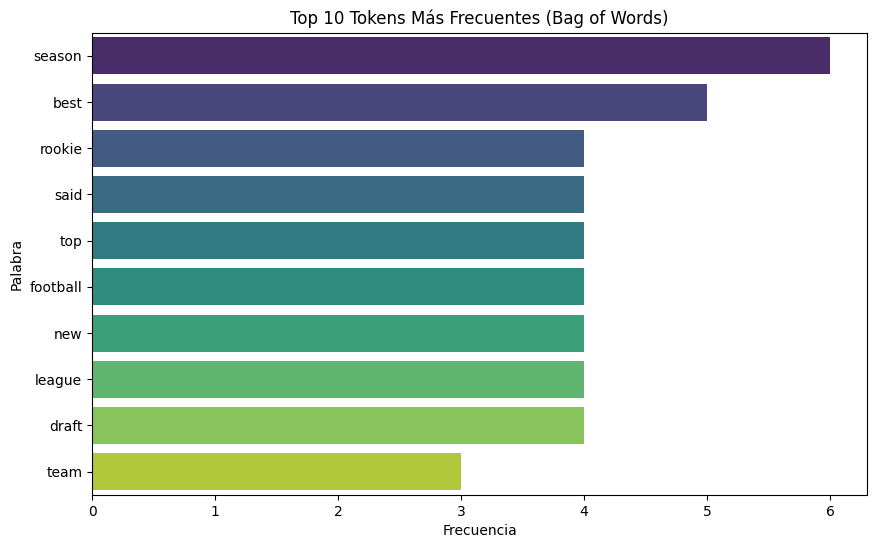

In [30]:
# Visualizar palabras más frecuentes con Bag of Words

# Sumamos la frecuencia de cada palabra

frecuencias = df_bow_token.sum().sort_values(ascending=False).head(10)

# Gráfico de barras
plt.figure(figsize=(10,6))
sns.barplot(x=frecuencias.values, y=frecuencias.index, palette="viridis")
plt.title("Top 10 Tokens Más Frecuentes (Bag of Words)")
plt.xlabel("Frecuencia")
plt.ylabel("Palabra")
plt.show()

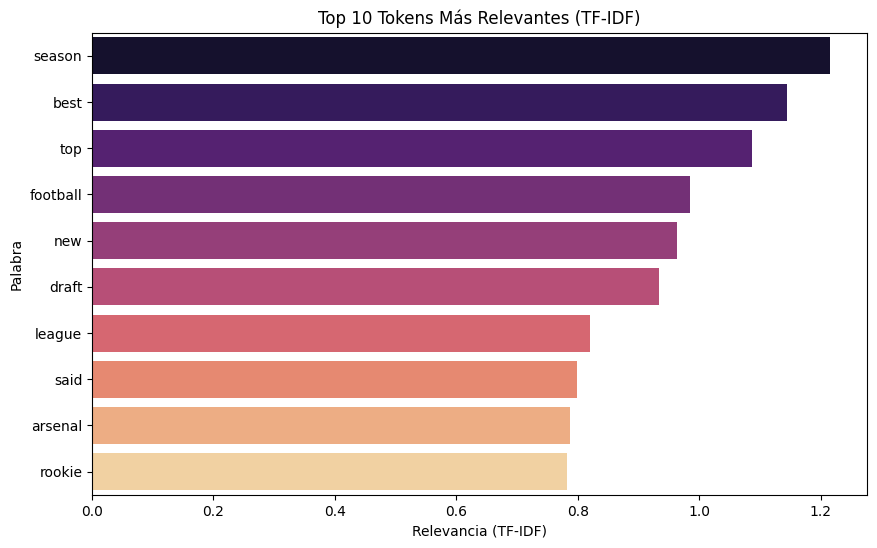

In [31]:
# Visualizar palabras con mayor peso en TF-IDF

# Sumamos los puntajes tf-idf por término y seleccionamos los más altos
tfidf_scores = df_tfidf_token.sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=tfidf_scores.values, y=tfidf_scores.index, palette="magma")
plt.title("Top 10 Tokens Más Relevantes (TF-IDF)")
plt.xlabel("Relevancia (TF-IDF)")
plt.ylabel("Palabra")
plt.show()


In [32]:
# Hagamos para los demas:

# Lemas
df_onehot_lemma = pd.DataFrame(onehot_lemma.toarray(), columns=vocab4)
df_bow_lemma = pd.DataFrame(bow_lemma.toarray(), columns=vocab5)
df_tfidf_lemma = pd.DataFrame(tfidf_lemma.toarray(), columns=vocab6)

# Stems
df_onehot_stem = pd.DataFrame(onehot_stemmas.toarray(), columns=vocab7)
df_bow_stem = pd.DataFrame(bow_stemmas.toarray(), columns=vocab8)
df_tfidf_stem = pd.DataFrame(tfidf_stemmas.toarray(), columns=vocab9)

# Bigramas
df_onehot_bigram = pd.DataFrame(onehot_bigramas.toarray(), columns=vocab10)
df_bow_bigram = pd.DataFrame(bow_bigramas.toarray(), columns=vocab11)
df_tfidf_bigram = pd.DataFrame(tfidf_bigramas.toarray(), columns=vocab12)

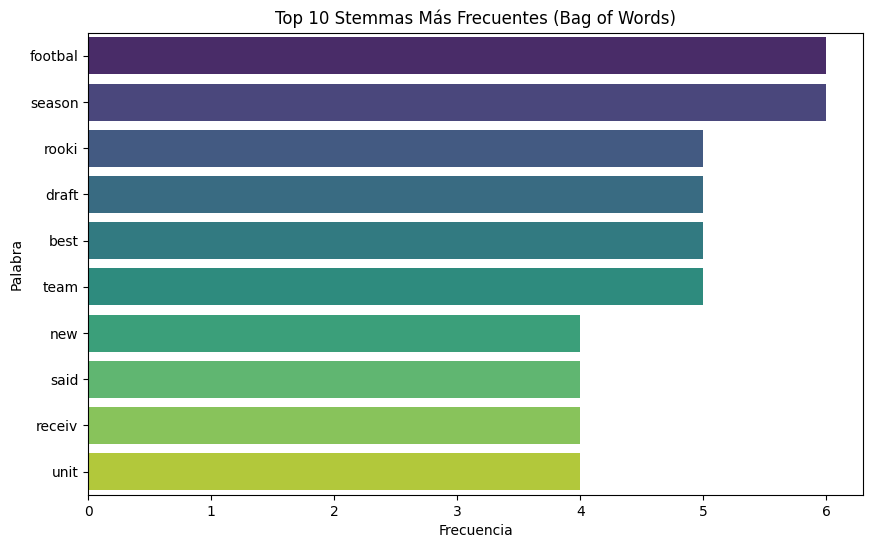

In [33]:
# Visualizar palabras más frecuentes con Bag of Words

# Sumamos la frecuencia de cada palabra

frecuencias = df_bow_stem.sum().sort_values(ascending=False).head(10)

# Gráfico de barras
plt.figure(figsize=(10,6))
sns.barplot(x=frecuencias.values, y=frecuencias.index, palette="viridis")
plt.title("Top 10 Stemmas Más Frecuentes (Bag of Words)")
plt.xlabel("Frecuencia")
plt.ylabel("Palabra")
plt.show()

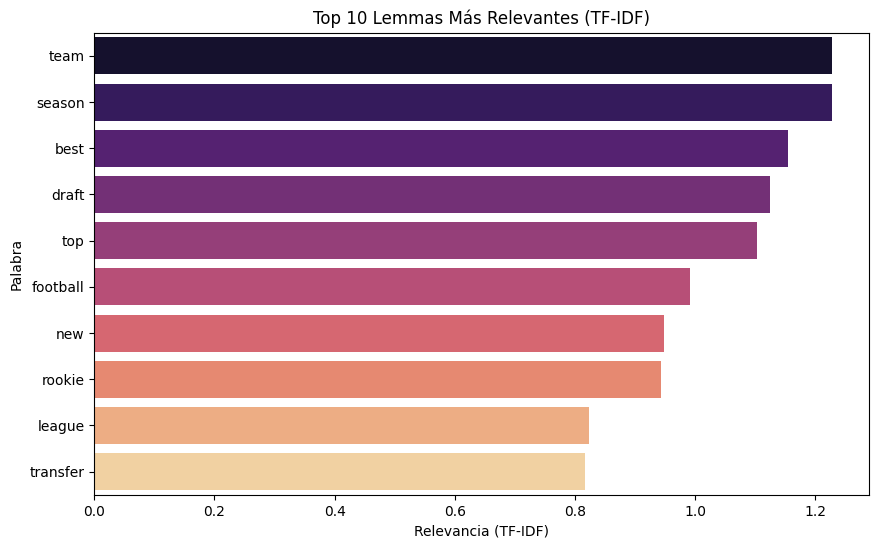

In [34]:
# Visualizar palabras con mayor peso en TF-IDF

# Sumamos los puntajes tf-idf por término y seleccionamos los más altos
tfidf_scores = df_tfidf_lemma.sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=tfidf_scores.values, y=tfidf_scores.index, palette="magma")
plt.title("Top 10 Lemmas Más Relevantes (TF-IDF)")
plt.xlabel("Relevancia (TF-IDF)")
plt.ylabel("Palabra")
plt.show()

<div style="background:#FFFFE0;padding:20px;color:#000000;margin-top:10px;">

Se exploraron tres representaciones vectoriales clásicas del texto: One-Hot Encoding, Bag of Words (BoW) y TF-IDF. Para cada representación, se aplicaron las técnicas tanto al corpus original como a sus versiones lematizadas, stemmizadas y con bigramas. El uso de CountVectorizer y TfidfVectorizer de sklearn permitió comparar cómo varía la matriz resultante en cada caso. Esta etapa fue clave para entender las fortalezas y limitaciones de cada enfoque: mientras BoW captura la frecuencia, TF-IDF penaliza los términos comunes, y One-Hot simplemente indica presencia. Se demostró cómo el preprocesamiento elegido impacta directamente en la calidad y densidad de la representación.
</div>

## 6. Representación de Texto mediante Word Embeddings
### Puntuación máxima de la tarea: 5
#### Se le da un codigo para que haga pruebas sobre word embeddings usando el famoso modelo preentrenado WordtoVec. Represente sus textos mediante Word Embeddings, entrenando los mismos sobre su propia colección de documentos

In [35]:
from gensim.test.utils import common_texts
from gensim.models import Word2Vec

In [36]:
common_texts

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

In [37]:
model=Word2Vec(sentences=common_texts, vector_size= 100, window=5, min_count=1, workers=4)

In [38]:
vector=model.wv['human']
vector

array([ 9.7702928e-03,  8.1651136e-03,  1.2809718e-03,  5.0975787e-03,
        1.4081288e-03, -6.4551616e-03, -1.4280510e-03,  6.4491653e-03,
       -4.6173059e-03, -3.9930656e-03,  4.9244044e-03,  2.7130984e-03,
       -1.8479753e-03, -2.8769434e-03,  6.0107317e-03, -5.7167388e-03,
       -3.2367026e-03, -6.4878250e-03, -4.2346325e-03, -8.5809948e-03,
       -4.4697891e-03, -8.5112294e-03,  1.4037776e-03, -8.6181965e-03,
       -9.9166557e-03, -8.2016252e-03, -6.7726658e-03,  6.6805850e-03,
        3.7845564e-03,  3.5616636e-04, -2.9579818e-03, -7.4283206e-03,
        5.3341867e-04,  4.9989222e-04,  1.9561886e-04,  8.5259555e-04,
        7.8633073e-04, -6.8160298e-05, -8.0070542e-03, -5.8702733e-03,
       -8.3829118e-03, -1.3120425e-03,  1.8206370e-03,  7.4171280e-03,
       -1.9634271e-03, -2.3252917e-03,  9.4871549e-03,  7.9704521e-05,
       -2.4045217e-03,  8.6048469e-03,  2.6870037e-03, -5.3439722e-03,
        6.5881060e-03,  4.5101536e-03, -7.0544672e-03, -3.2317400e-04,
      

In [39]:
similar=model.wv.most_similar('human',topn=5)

In [40]:
similar

[('trees', 0.17272792756557465),
 ('eps', 0.16694682836532593),
 ('response', 0.11118265986442566),
 ('interface', 0.10940765589475632),
 ('system', 0.079634889960289)]

In [41]:
# Vamos utilizar los tokens con no stopwords para hacer los word
textos_tokenizados = df['no stopwords'].tolist()

In [42]:
# Entrenamos el modelo
model = Word2Vec(sentences=textos_tokenizados, window=5, min_count=1, workers=4)

In [43]:
# Imprimimos las primeras palabras en el vocabulario
print("Primeras palabras en vocabulario:", list(model.wv.key_to_index.keys())[:10])

Primeras palabras en vocabulario: ['season', 'best', 'top', 'football', 'new', 'league', 'draft', 'rookie', 'said', 'liverpool']


In [44]:
# Probamos con una palabra del vocabulario
palabra = list(model.wv.key_to_index.keys())[0]
vector = model.wv[palabra]

print(f"Vector para '{palabra}':\n{vector}")

Vector para 'season':
[-5.8680098e-04  2.9737627e-04  5.1474334e-03  9.0509495e-03
 -9.3419161e-03 -7.2265305e-03  6.4739170e-03  9.0721417e-03
 -5.0102752e-03 -3.7964834e-03  7.3255803e-03 -1.6052702e-03
 -4.5403000e-03  6.5486003e-03 -4.8567769e-03 -1.8845866e-03
  2.8901042e-03  8.8057527e-04 -8.2857180e-03 -9.5557487e-03
  7.3167076e-03  5.0802883e-03  6.7993482e-03  6.6909409e-04
  6.3261944e-03 -3.3501789e-03 -9.5876650e-04  5.7086558e-03
 -7.6051862e-03 -3.9098528e-03 -7.4494770e-03 -8.9152349e-04
  9.5526911e-03 -7.3474837e-03 -2.3795855e-03 -1.8986488e-03
  8.0483342e-03 -5.9849806e-03  5.6332624e-06 -4.8943856e-03
 -9.6178856e-03  4.9535767e-03 -8.8615976e-03 -4.4180779e-03
  5.2613388e-05 -3.5502916e-04 -7.6729329e-03  9.6397223e-03
  5.0341338e-03  9.2686890e-03 -8.0956025e-03  4.4017346e-03
 -4.1266899e-03  8.4317551e-04  8.4532732e-03 -4.4114054e-03
  4.4862926e-03 -6.7971046e-03 -3.6602302e-03  9.3924711e-03
 -1.5972024e-03  3.6320993e-04 -4.2084581e-03 -7.7043530e-03
 -

In [45]:
# Palabras similares
print(f"Palabras similares a '{palabra}':")
for similar_word, similarity in model.wv.most_similar(palabra, topn=5):
    print(f"{similar_word}: {similarity:.4f}")


Palabras similares a 'season':
lamine: 0.3601
facing: 0.2909
practice: 0.2768
chosen: 0.2730
baseballs: 0.2314


<div style="background:#FFFFE0;padding:20px;color:#000000;margin-top:10px;">

En esta sección entrenamos un modelo Word2Vec utilizando nuestra propia colección de documentos tokenizados. Esto nos permitió transformar las palabras en vectores numéricos que capturan relaciones semánticas y contextuales entre términos del corpus. A través de este entrenamiento personalizado, pudimos obtener representaciones que reflejan mejor el significado de las palabras en el contexto específico de nuestro conjunto de datos, a diferencia de modelos preentrenados generales.

Además, exploramos el vocabulario generado por el modelo y verificamos las palabras más similares para entender cómo el modelo agrupa términos relacionados. Este enfoque es fundamental para tareas de procesamiento de lenguaje natural donde la comprensión contextual es clave.

En resumen, el uso de Word2Vec sobre nuestro corpus nos brinda una representación densa y semántica del texto que complementa las representaciones tradicionales como bag-of-words y TF-IDF, y que puede mejorar el desempeño en aplicaciones posteriores de análisis y modelado del lenguaje.

</div>

## 7. Profundizando sobre Word Embeddings
### Puntuación máxima de la tarea: 6
####  Investigue más en profundidad la librería gensim. Puede encontrar más detalles aquí: https://radimrehurek.com/gensim/models/word2vec.html, pero siéntase libre de usar otras fuentes
#### De manera especial preste atención a lo siguiente: guardado de modelos para entrenamientos futuros, KeyedVectors para mejorar eficiencia y modelos de Word Embeddings pre-entrenados. Debe aplicar todos estos conceptos para realizar una nueva representación de su colección de documentos.

<div style="background:#FFFFE0;padding:20px;color:#000000;margin-top:10px;">
<b>Guardado y carga del modelo Word2Vec </b>
<br>
Para no perder el trabajo de entrenamiento y poder reutilizar el modelo más adelante sin tener que volver a entrenarlo, gensim permite guardar y cargar modelos fácilmente.

</div>

In [46]:
# Guardar el modelo entrenado
model.save('modelos/modelo_word2vec_custom.model')

# Cargar el modelo guardado
model_cargado = Word2Vec.load('modelos/modelo_word2vec_custom.model')


<div style="background:#FFFFE0;padding:20px;color:#000000;margin-top:10px;">

<b>Uso de KeyedVectors para eficiencia</b>

Cuando solo necesitas los vectores de palabras (sin la capacidad de seguir entrenando), puedes guardar solo los vectores con KeyedVectors. Esto reduce el tamaño del archivo y mejora la velocidad de carga. 

</div>

In [47]:
# Guardar solo los vectores (KeyedVectors)
model.wv.save('model_vectors.kv')

# Cargar solo los vectores
wv = KeyedVectors.load('model_vectors.kv', mmap='r')

# Usar los vectores cargados para encontrar similares
similares = wv.most_similar('season')


In [48]:
print(similares)

[('lamine', 0.36014819145202637), ('facing', 0.29093095660209656), ('practice', 0.2767980992794037), ('chosen', 0.27303817868232727), ('baseballs', 0.2313571274280548), ('bill', 0.22128373384475708), ('forward', 0.22048157453536987), ('liverpool', 0.21701906621456146), ('charlie', 0.20795759558677673), ('first', 0.20639093220233917)]


<div style="background:#FFFFE0;padding:20px;color:#000000;margin-top:10px;">

En esta última parte se continuó trabajando con el modelo Word2Vec entrenado anteriormente. Primero se guardó el modelo en disco para poder reutilizarlo sin tener que volver a entrenarlo. Luego se cargó utilizando una estructura optimizada (KeyedVectors) que permite trabajar con menos recursos. También se exploraron algunas funciones útiles del modelo, como obtener palabras similares a otras.

</div>

<div style="background:#FFFFE0;padding:20px;color:#000000;margin-top:10px;">
<strong>Referencias Bibliográficas</strong>
<br><br>

- [Text Processing NLP Pipeline - GitHub](https://github.com/Shubha23/Text-processing-NLP/blob/master/NLP%20-%20Text%20processing%20pipeline.ipynb)
- [How to Clean & Preprocess Text Data Using Pandas for NLP Tasks - LinkedIn](https://www.linkedin.com/pulse/how-clean-preprocess-text-data-using-pandas-nlp-tasks-yamil-garcia-gk7re/)
- [Cleaning and Preprocessing Text Data in Pandas for NLP Tasks - KDnuggets](https://www.kdnuggets.com/cleaning-and-preprocessing-text-data-in-pandas-for-nlp-tasks)
- [Pandas Plotting - W3Schools](https://www.w3schools.com/python/pandas/pandas_plotting.asp)
- [TfidfVectorizer - scikit-learn Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)



</div>